In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [6]:
X = df.drop(['User ID', 'Purchased'], axis = 1)
y = df.Purchased

In [7]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
X_train.shape

(300, 3)

In [11]:
X_test.shape

(100, 3)

In [ ]:
# Finding the optimal value of K 

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
scores = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scr = accuracy_score(y_test, y_pred)
    scores.append(scr)
    # scr = knn.score(X_test, y_test)

print(scores)

[0.8, 0.76, 0.81, 0.78, 0.82, 0.78, 0.83, 0.78, 0.82, 0.8, 0.81, 0.79, 0.76, 0.79, 0.81, 0.77, 0.77, 0.76, 0.78, 0.77]


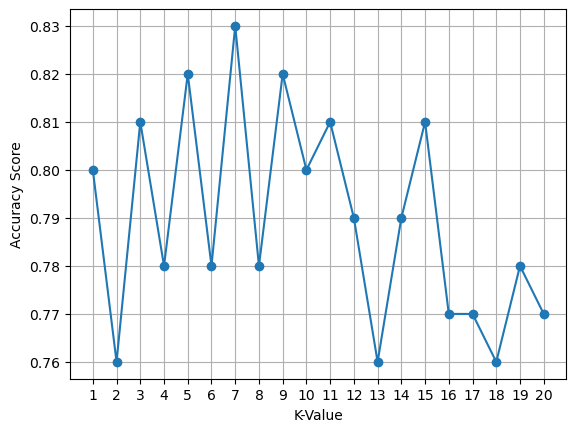

In [17]:
plt.plot(range(1,21), scores, marker = 'o')
plt.xlabel('K-Value')
plt.ylabel('Accuracy Score')
plt.xticks(range(1,21,1))
plt.grid()
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.83

In [19]:
confusion_matrix(y_test, y_pred)

array([[59,  4],
       [13, 24]])